# Plus
### Determine the amount of days the game was played

In [252]:
import pandas as pd

# Specify the file path to the plus_hist, min_hist, and mul_hist csv files
plus_file_path = "C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/plus_hist.csv"
min_file_path = "C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/min_hist.csv"
mul_file_path = "C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/mul_hist.csv"

# Read the csv files into dataframes
plus_df = pd.read_csv(plus_file_path)
min_df = pd.read_csv(min_file_path)
mul_df = pd.read_csv(mul_file_path)

# Determine the amount of distinct entries in the 'Date' columns of the dataframes
plus_dates = plus_df['Date'].nunique()
min_dates = min_df['Date'].nunique()
mul_dates = mul_df['Date'].nunique()

# Combine the 'Date' columns from all three dataframes into a single series
all_dates_series = pd.concat([plus_df['Date'], min_df['Date'], mul_df['Date']])

# Determine the combined amount of distinct entries in the 'Date' columns
combined_dates = all_dates_series.nunique()

# Print the results
print("Distinct dates in plus_df:", plus_dates)
print("Distinct dates in min_df:", min_dates)
print("Distinct dates in mul_df:", mul_dates)
print("Combined distinct dates in all dataframes:", combined_dates)
print("")

# Print the total amount of entries in the histiry tables
print("Total entries in plus_df:", plus_df.shape[0])
print("Total entries in min_df:", min_df.shape[0])
print("Total entries in mul_df:", mul_df.shape[0])


Distinct dates in plus_df: 7
Distinct dates in min_df: 7
Distinct dates in mul_df: 7
Combined distinct dates in all dataframes: 7

Total entries in plus_df: 11766
Total entries in min_df: 6152
Total entries in mul_df: 3225


### Determine the player IDs of the players who participated in each game

In [253]:
import pandas as pd

# Specify the file paths to the plus_performance.csv file and the players.csv file
plus_performance_file_path = "C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/plus_performance.csv"
players_file_path = "C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/players.csv"

# Read the CSV files into dataframes
df_plus_per = pd.read_csv(plus_performance_file_path)
df_players = pd.read_csv(players_file_path)

# Get the total number of player IDs
total_players = df_players['player_ID'].nunique()

# print the unique player IDs in the player dataframe
print("Unique player IDs in the player dataframe:", df_players['player_ID'].unique())
print("")

# Calculate the halfway point for dividing player IDs into four groups
halfway_point = total_players // 2

# Split the data into four groups based on index values
class1_ml_players = df_players[df_players.index < halfway_point]
class1_ml_players = class1_ml_players[class1_ml_players['player_ID'] % 2 == 0]['player_ID'].unique()

class1_normal_players = df_players[df_players.index < halfway_point]
class1_normal_players = class1_normal_players[class1_normal_players['player_ID'] % 2 != 0]['player_ID'].unique()

class2_ml_players = df_players[df_players.index >= halfway_point]
class2_ml_players = class2_ml_players[class2_ml_players['player_ID'] % 2 == 0]['player_ID'].unique()

class2_normal_players = df_players[df_players.index >= halfway_point]
class2_normal_players = class2_normal_players[class2_normal_players['player_ID'] % 2 != 0]['player_ID'].unique()

# Print the player IDs for the four groups
print("Player IDs in Class 1 ML:", class1_ml_players)
print("Player IDs in Class 1 Normal:", class1_normal_players)
print("Player IDs in Class 2 ML:", class2_ml_players)
print("Player IDs in Class 2 Normal:", class2_normal_players)

Unique player IDs in the player dataframe: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 64]

Player IDs in Class 1 ML: [40 42 44 46 48 50]
Player IDs in Class 1 Normal: [39 41 43 45 47 49]
Player IDs in Class 2 ML: [52 54 56 58 60 64]
Player IDs in Class 2 Normal: [51 53 55 57 59 61]


### History of player 53

In [254]:
# Filter the dataframe for player with player_ID 53 on the last day
player_53_last_day = plus_df[(plus_df['player_ID'] == 53) & (plus_df['Date'] == plus_df[plus_df['player_ID'] == 53]['Date'].max())]

# Save the results to a csv file
player_53_last_day.to_csv("C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/player_53_last_day.csv", index=False)

# Filter the dataframe for player with player_ID 53 on the second last day
player_53_second_last_day = plus_df[(plus_df['player_ID'] == 53) & (plus_df['Date'] == plus_df[plus_df['player_ID'] == 53]['Date'].unique()[-2])]

# Save the results to a csv file
player_53_second_last_day.to_csv("C:/Users/Leon/OneDrive - North-West University/Documents/NWU 4/FYP/Test results/Player evaluation/player_53_second_last_day.csv", index=False)

### Determine player's math ability (plus)

In [255]:
# Remove duplicate entries from the history tables

# Remove duplicate entries and keep only the first occurrence
plus_df_clean = plus_df.drop_duplicates(subset=['player_ID', 'Date', 'FirstNum', 'SecondNum', 'PlayerAns'], keep='first')
min_df_clean = min_df.drop_duplicates(subset=['player_ID', 'Date', 'FirstNum', 'SecondNum', 'PlayerAns'], keep='first')
mul_df_clean = mul_df.drop_duplicates(subset=['player_ID', 'Date', 'FirstNum', 'SecondNum', 'PlayerAns'], keep='first')

# Save the cleaned dataframe to a new CSV file
plus_df_clean.to_csv("plus_df_cleaned.csv", index=False)
min_df_clean.to_csv("min_df_cleaned.csv", index=False)
mul_df_clean.to_csv("mul_df_cleaned.csv", index=False)

# Print the total amount of entries in the cleaned history tables
print("Total entries in plus_df_clean:", plus_df_clean.shape[0])
print("Total entries in min_df_clean:", min_df_clean.shape[0])
print("Total entries in mul_df_clean:", mul_df_clean.shape[0])

Total entries in plus_df_clean: 9287
Total entries in min_df_clean: 4875
Total entries in mul_df_clean: 2440


In [256]:
import pandas as pd

# Create an empty dictionary to store player information
player_info_dict = {}

# Group the plus_df_clean dataframe by player_ID
grouped = plus_df_clean.groupby('player_ID')

# Define the function to determine the group based on player_ID
def get_group(player_id):
    if player_id in class1_ml_players:
        return "Class 1 ML"
    elif player_id in class1_normal_players:
        return "Class 1 Normal"
    elif player_id in class2_ml_players:
        return "Class 2 ML"
    elif player_id in class2_normal_players:
        return "Class 2 Normal"
    else:
        return "Unknown"

# Iterate through each player's data
for player_id, group in grouped:
    first_day = group['Date'].min()
    last_day = group['Date'].max()
    first_ability_acc = group[group['Date'] == first_day]['Correct'].mean()
    last_ability_acc = group[group['Date'] == last_day]['Correct'].mean()
    
    first_day_data = group[group['Date'] == first_day]
    last_day_data = group[group['Date'] == last_day]

    # Consider only the equations that were calculated correctly
    first_ability_solving_time = first_day_data[first_day_data['Correct'] == 1]['Time'].mean()
    last_ability_solving_time = last_day_data[last_day_data['Correct'] == 1]['Time'].mean()
    
    total_equations = group.shape[0]

    # Determine the group based on player_ID
    group = get_group(player_id)

    player_info_dict[player_id] = {
        'player_ID': player_id,
        'group': group,
        'first_day': first_day,
        'last_day': last_day,
        'first_ability_acc': first_ability_acc,
        'last_ability_acc': last_ability_acc,
        'first_ability_solving_time': first_ability_solving_time,
        'last_ability_solving_time': last_ability_solving_time,
        'total_equations': total_equations
    }

# Remove player with player_ID 53 from the dictionary
del player_info_dict[53]

# Create a dataframe from the player_info_dict
player_info_df = pd.DataFrame.from_dict(player_info_dict, orient='index')

# Print the dataframe
print(player_info_df)

# Save the dataframe to a CSV file
player_info_df.to_csv("plus_player_info.csv", index=False)

    player_ID           group   first_day    last_day  first_ability_acc  \
39         39  Class 1 Normal  2023-10-24  2023-11-01           0.687898   
40         40      Class 1 ML  2023-10-24  2023-10-25           0.831034   
41         41  Class 1 Normal  2023-10-24  2023-10-25           0.372500   
42         42      Class 1 ML  2023-10-24  2023-11-01           0.900000   
43         43  Class 1 Normal  2023-10-24  2023-11-01           0.621918   
44         44      Class 1 ML  2023-10-24  2023-11-01           0.600000   
45         45  Class 1 Normal  2023-10-24  2023-11-01           0.683230   
46         46      Class 1 ML  2023-10-24  2023-10-25           0.847973   
47         47  Class 1 Normal  2023-10-24  2023-11-01           0.834862   
48         48      Class 1 ML  2023-10-24  2023-10-30           0.714976   
49         49  Class 1 Normal  2023-10-24  2023-10-26           0.717172   
50         50      Class 1 ML  2023-10-24  2023-11-03           0.659420   
51         5

Difference between first and last day averages:1.119941542328633


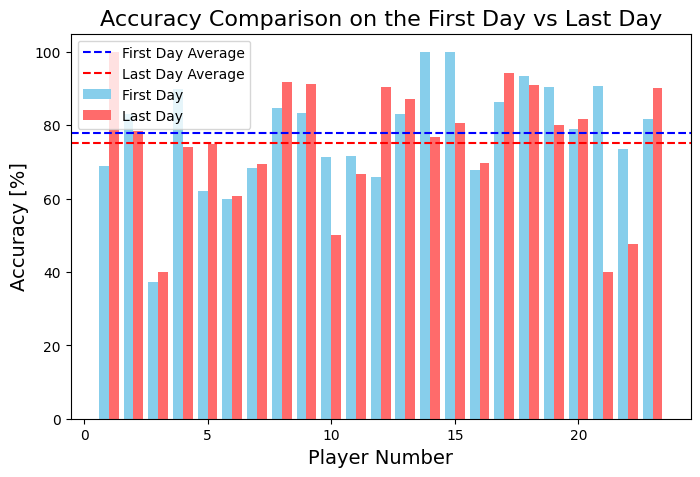

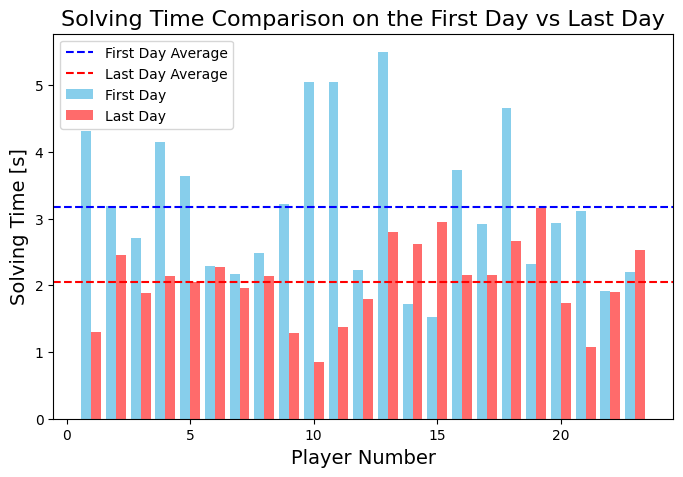

In [258]:
import matplotlib.pyplot as plt

# Create a figure and axis for accuracy comparison
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create 'Player number' by mapping 'player_ID' values
player_info_df['Player number'] = range(1, len(player_info_df) + 1)

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Accuracy values for the first and last days
first_day_acc = player_info_df['first_ability_acc']
last_day_acc = player_info_df['last_ability_acc']

# Convert accuracy values to percentages
first_day_acc = first_day_acc * 100
last_day_acc = last_day_acc * 100

# Calculate averages for the first and last days
first_day_avg = first_day_acc.mean()
last_day_avg = last_day_acc.mean()

# Define custom colors
light_blue = '#87CEEB'  # Light blue
light_red = '#FF6B6B'  # Light red

# Create bar plots for accuracy
ax1.bar(x - 0.2, first_day_acc, width=0.4, label='First Day', align='center', color=light_blue)
ax1.bar(x + 0.2, last_day_acc, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for accuracy averages
ax1.axhline(first_day_avg, color='blue', linestyle='--', label='First Day Average')
ax1.axhline(last_day_avg, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for accuracy comparison
ax1.set_xlabel('Player Number', fontsize=14)
ax1.set_ylabel('Accuracy [%]', fontsize=14)
ax1.set_title('Accuracy Comparison on the First Day vs Last Day', fontsize=16)
ax1.legend(loc='upper left')

# Create a figure and axis for solving time comparison
fig, ax2 = plt.subplots(figsize=(8, 5))

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Solving time values for the first and last days
first_day_solving_time = player_info_df['first_ability_solving_time']
last_day_solving_time = player_info_df['last_ability_solving_time']

# Convert solving time from milliseconds to seconds
first_day_solving_time = first_day_solving_time / 1000
last_day_solving_time = last_day_solving_time / 1000

# Calculate averages for the first and last days
first_day_avg_solving_time = first_day_solving_time.mean()
last_day_avg_solving_time = last_day_solving_time.mean()

# Print the difference between the first and last day averages
print("Difference between first and last day averages:" + str(first_day_avg_solving_time - last_day_avg_solving_time))

# Create bar plots for solving time
ax2.bar(x - 0.2, first_day_solving_time, width=0.4, label='First Day', align='center', color=light_blue)
ax2.bar(x + 0.2, last_day_solving_time, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for solving time averages
ax2.axhline(first_day_avg_solving_time, color='blue', linestyle='--', label='First Day Average')
ax2.axhline(last_day_avg_solving_time, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for solving time comparison
ax2.set_xlabel('Player Number', fontsize=14)
ax2.set_ylabel('Solving Time [s]', fontsize=14)
ax2.set_title('Solving Time Comparison on the First Day vs Last Day', fontsize=16)
ax2.legend(loc='upper left')

# Show the plots
plt.show()

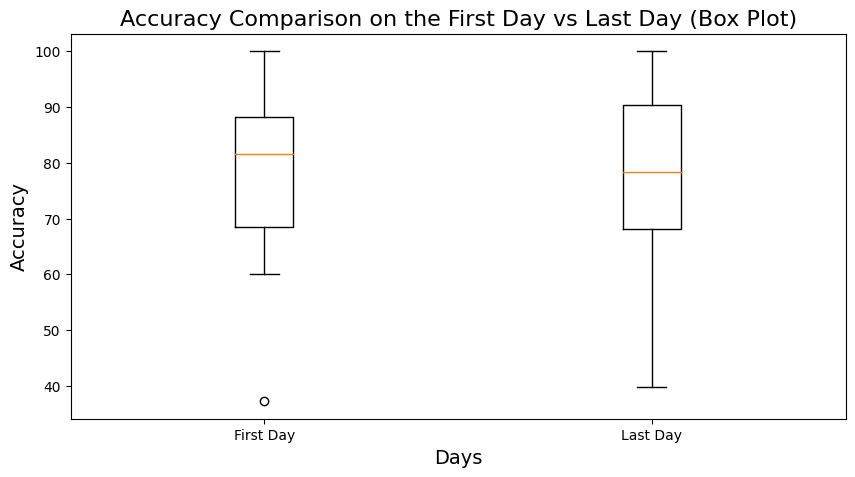

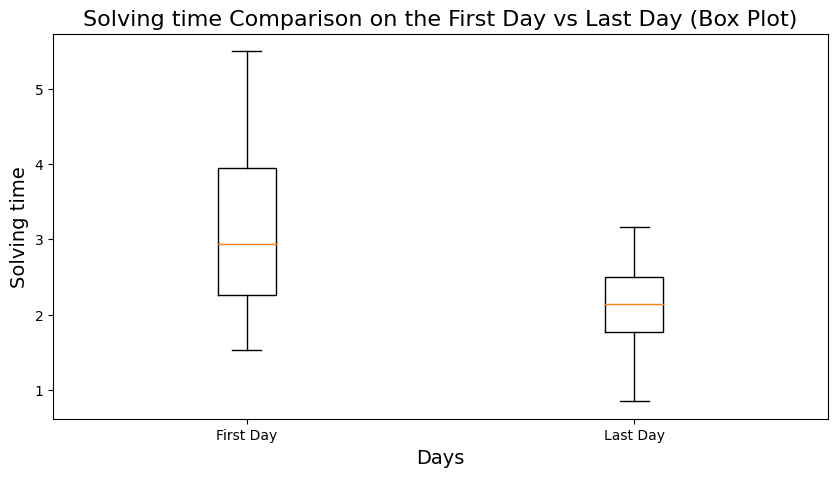

In [260]:
import matplotlib.pyplot as plt

# Create a figure and axis for accuracy box plots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Accuracy values for the first and last days
first_day_acc = player_info_df['first_ability_acc']
last_day_acc = player_info_df['last_ability_acc']

# Convert accuracy values to percentages
first_day_acc *= 100
last_day_acc *= 100

# Create box plots for accuracy
box_data = [first_day_acc, last_day_acc]
labels = ['First Day', 'Last Day']
ax1.boxplot(box_data, labels=labels)

# Set labels and title for accuracy box plots
ax1.set_xlabel('Days', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
ax1.set_title('Accuracy Comparison on the First Day vs Last Day (Box Plot)', fontsize=16)

# Create a figure and axis for solving time box plots
fig, ax2 = plt.subplots(figsize=(10, 5))

# Solving time values for the first and last days
first_day_solving_time = player_info_df['first_ability_solving_time']
last_day_solving_time = player_info_df['last_ability_solving_time']

# Convert solving time from miliseconds to seconds
first_day_solving_time /= 1000
last_day_solving_time /= 1000

# Create box plots for solving time
box_data = [first_day_solving_time, last_day_solving_time]
labels = ['First Day', 'Last Day']
ax2.boxplot(box_data, labels=labels)

# Set labels and title for solving time box plots
ax2.set_xlabel('Days', fontsize=14)
ax2.set_ylabel('Solving time', fontsize=14)
ax2.set_title('Solving time Comparison on the First Day vs Last Day (Box Plot)', fontsize=16)

# Show the box plots
plt.show()

### Determine delta values of the 4 groups

In [261]:
# Initialize lists to store delta values
accuracy_deltas_class1_ml = []
accuracy_deltas_class1_normal = []
accuracy_deltas_class2_ml = []
accuracy_deltas_class2_normal = []

solving_time_deltas_class1_ml = []
solving_time_deltas_class1_normal = []
solving_time_deltas_class2_ml = []
solving_time_deltas_class2_normal = []

# Calculate delta values for accuracy and solving time for each player
for player_id, data in player_info_dict.items():
    first_acc = data['first_ability_acc']
    last_acc = data['last_ability_acc']
    first_time = data['first_ability_solving_time']
    last_time = data['last_ability_solving_time']
    # Convert time from milliseconds to seconds
    first_time /= 1000
    last_time /= 1000
    
    accuracy_delta = last_acc - first_acc
    solving_time_delta = last_time - first_time
    
    if player_id in class1_ml_players:
        accuracy_deltas_class1_ml.append(accuracy_delta)
        solving_time_deltas_class1_ml.append(solving_time_delta)
    elif player_id in class1_normal_players:
        accuracy_deltas_class1_normal.append(accuracy_delta)
        solving_time_deltas_class1_normal.append(solving_time_delta)
    elif player_id in class2_ml_players:
        accuracy_deltas_class2_ml.append(accuracy_delta)
        solving_time_deltas_class2_ml.append(solving_time_delta)
    elif player_id in class2_normal_players:
        accuracy_deltas_class2_normal.append(accuracy_delta)
        solving_time_deltas_class2_normal.append(solving_time_delta)

# Save the two dataframes in CSV files
'''accuracy_deltas_df.to_csv("accuracy_deltas.csv", index=False)
solving_time_deltas_df.to_csv("solving_time_deltas.csv", index=False)'''

'accuracy_deltas_df.to_csv("accuracy_deltas.csv", index=False)\nsolving_time_deltas_df.to_csv("solving_time_deltas.csv", index=False)'

In [262]:
import numpy as np

# Create accuracy delta array
accuracy_deltas = np.concatenate((
    accuracy_deltas_class1_ml,
    accuracy_deltas_class1_normal,
    accuracy_deltas_class2_ml,
    accuracy_deltas_class2_normal
))

#print(accuracy_deltas)

# Create the Game and Class arrays
Game = ['ML'] * 6 + ['Normal'] * 6 + ['ML'] * 6 + ['Normal'] * 5
Class = ['One'] * 12 + ['Two'] * 11

# Create a dictionary with the data
data = {
    'Game': Game,
    'Class': Class,
    'Delta': accuracy_deltas
}

# Create the accuracy_dataframe
accuracy_dataframe = pd.DataFrame(data)

# Print the accuracy_dataframe
print(accuracy_dataframe)

# Create solving time delta array
solving_time_deltas = np.concatenate((
    solving_time_deltas_class1_ml,
    solving_time_deltas_class1_normal,
    solving_time_deltas_class2_ml,
    solving_time_deltas_class2_normal
))

# Create a dictionary with the data
data = {
    'Game': Game,
    'Class': Class,
    'Delta': solving_time_deltas
}

# Create the solving_time_dataframe
solving_time_dataframe = pd.DataFrame(data)

print(solving_time_dataframe)


      Game Class     Delta
0       ML   One -0.047251
1       ML   One -0.158065
2       ML   One  0.008696
3       ML   One  0.070632
4       ML   One -0.214976
5       ML   One  0.245342
6   Normal   One  0.312102
7   Normal   One  0.026310
8   Normal   One  0.128082
9   Normal   One  0.012422
10  Normal   One  0.078181
11  Normal   One -0.050505
12      ML   Two -0.231788
13      ML   Two -0.192982
14      ML   Two  0.077992
15      ML   Two -0.103846
16      ML   Two -0.507563
17      ML   Two  0.084774
18  Normal   Two  0.042731
19  Normal   Two  0.016833
20  Normal   Two -0.026393
21  Normal   Two  0.028708
22  Normal   Two -0.259919
      Game Class     Delta
0       ML   One -0.735182
1       ML   One -2.015924
2       ML   One -0.023087
3       ML   One -0.341827
4       ML   One -4.197869
5       ML   One -0.423853
6   Normal   One -3.014731
7   Normal   One -0.816886
8   Normal   One -1.595111
9   Normal   One -0.199127
10  Normal   One -1.936778
11  Normal   One -3.662351
1

### Perform 2 way anova on accuracy delta values

In [263]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

# Create an OLS model
model = ols('Delta ~ C(Game) + C(Class) + C(Game):C(Class)', data=accuracy_dataframe).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Game),0.060798,1.0,2.193807,0.154960
C(Class),0.092330,1.0,3.331587,0.083724
C(Game):C(Class),0.000045,1.0,0.001612,0.968394
Residual,0.526558,19.0,NaN,NaN


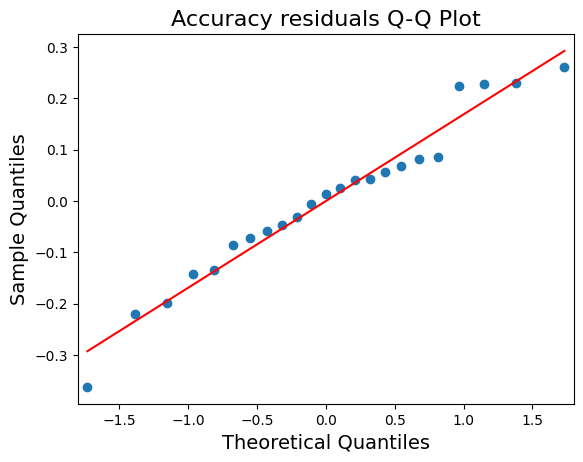

0.02771357894736842


In [264]:
# Plot residuals
residuals = model.resid
qqplot = sm.qqplot(residuals, line='r')
plt.title("Accuracy residuals Q-Q Plot", fontsize=16)  # Set the title font size

# Set font size for axis labels
plt.xlabel("Theoretical Quantiles", fontsize=14)  # X-axis label font size
plt.ylabel("Sample Quantiles", fontsize=14)  # Y-axis label font size

plt.show()

print(0.526558/19)


### Perform 2 way anova on solving time delta values

In [265]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create an OLS model
model = ols('Delta ~ C(Game) + C(Class) + C(Game):C(Class)', data=solving_time_dataframe).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Game),6.579566,1.0,3.738004,0.068229
C(Class),4.781362,1.0,2.716403,0.115759
C(Game):C(Class),1.516461,1.0,0.861537,0.364951
Residual,33.443450,19.0,NaN,NaN


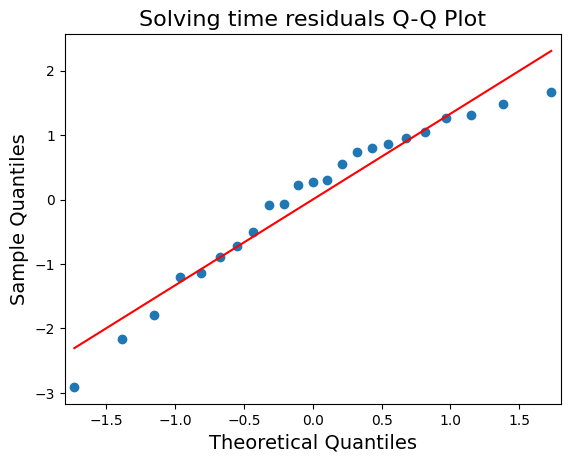

In [266]:
# Plot residuals
residuals = model.resid
qqplot = sm.qqplot(residuals, line='r')
plt.title("Solving time residuals Q-Q Plot", fontsize=16)  # Set the title font size

# Set font size for axis labels
plt.xlabel("Theoretical Quantiles", fontsize=14)  # X-axis label font size
plt.ylabel("Sample Quantiles", fontsize=14)  # Y-axis label font size

plt.show()

### Paired t-test

In [267]:
import pandas as pd 
import scipy.stats as stats 

# Load the data from the CSV file
player_info_df = pd.read_csv("plus_player_info.csv")

# Filter the data to include only the relevant columns
accuracy_first = player_info_df['first_ability_acc']
accuracy_last = player_info_df['last_ability_acc']
solving_time_first = player_info_df['first_ability_solving_time']
solving_time_last = player_info_df['last_ability_solving_time']

In [268]:
# Test 1 - accuracy
stats.ttest_rel(accuracy_first, accuracy_last)

TtestResult(statistic=0.7794189452011236, pvalue=0.4440372431821238, df=22)

In [269]:
# Test 2 - solving time
stats.ttest_rel(solving_time_first, solving_time_last)

TtestResult(statistic=3.680367578974518, pvalue=0.0013108554773109827, df=22)

### Wilcoxen test

In [270]:
import scipy.stats as stats

# Test 1 - accuracy
stats.wilcoxon(accuracy_first, accuracy_last)

WilcoxonResult(statistic=126.0, pvalue=0.7313888072967529)

In [271]:
# Test 2 - solving time
stats.wilcoxon(solving_time_first, solving_time_last)

WilcoxonResult(statistic=38.0, pvalue=0.0014584064483642578)

# Minus

In [273]:
import pandas as pd

# Create an empty dictionary to store player information
player_info_dict = {}

# Group the plus_df_clean dataframe by player_ID
grouped = min_df_clean.groupby('player_ID')

# Define the function to determine the group based on player_ID
def get_group(player_id):
    if player_id in class1_ml_players:
        return "Class 1 ML"
    elif player_id in class1_normal_players:
        return "Class 1 Normal"
    elif player_id in class2_ml_players:
        return "Class 2 ML"
    elif player_id in class2_normal_players:
        return "Class 2 Normal"
    else:
        return "Unknown"

# Iterate through each player's data
for player_id, group in grouped:
    first_day = group['Date'].min()
    last_day = group['Date'].max()
    first_ability_acc = group[group['Date'] == first_day]['Correct'].mean()
    last_ability_acc = group[group['Date'] == last_day]['Correct'].mean()
    
    first_day_data = group[group['Date'] == first_day]
    last_day_data = group[group['Date'] == last_day]

    # Consider only the equations that were calculated correctly
    first_ability_solving_time = first_day_data[first_day_data['Correct'] == 1]['Time'].mean()
    last_ability_solving_time = last_day_data[last_day_data['Correct'] == 1]['Time'].mean()
    
    total_equations = group.shape[0]

    # Determine the group based on player_ID
    group = get_group(player_id)

    player_info_dict[player_id] = {
        'player_ID': player_id,
        'group': group,
        'first_day': first_day,
        'last_day': last_day,
        'first_ability_acc': first_ability_acc,
        'last_ability_acc': last_ability_acc,
        'first_ability_solving_time': first_ability_solving_time,
        'last_ability_solving_time': last_ability_solving_time,
        'total_equations': total_equations
    }

# Remove player with player_ID 53 from the dictionary
#del player_info_dict[53]

# Create a dataframe from the player_info_dict
player_info_df = pd.DataFrame.from_dict(player_info_dict, orient='index')

# Print the dataframe
print(player_info_df)

# Save the dataframe to a CSV file
player_info_df.to_csv("min_player_info.csv", index=False)

    player_ID           group   first_day    last_day  first_ability_acc  \
39         39  Class 1 Normal  2023-10-25  2023-11-01           1.000000   
40         40      Class 1 ML  2023-10-24  2023-10-26           0.666667   
41         41  Class 1 Normal  2023-10-25  2023-10-26           0.343284   
42         42      Class 1 ML  2023-10-24  2023-11-01           0.964286   
44         44      Class 1 ML  2023-10-25  2023-10-31           0.511211   
46         46      Class 1 ML  2023-10-25  2023-10-31           0.743802   
47         47  Class 1 Normal  2023-10-24  2023-10-26           0.847222   
48         48      Class 1 ML  2023-10-24  2023-10-30           0.573770   
49         49  Class 1 Normal  2023-10-25  2023-10-25           0.863636   
50         50      Class 1 ML  2023-10-25  2023-10-30           0.863014   
51         51  Class 2 Normal  2023-10-25  2023-11-01           0.842105   
52         52      Class 2 ML  2023-10-30  2023-11-01           0.906250   
54         5

Difference between first and last day averages:0.25556243238358567


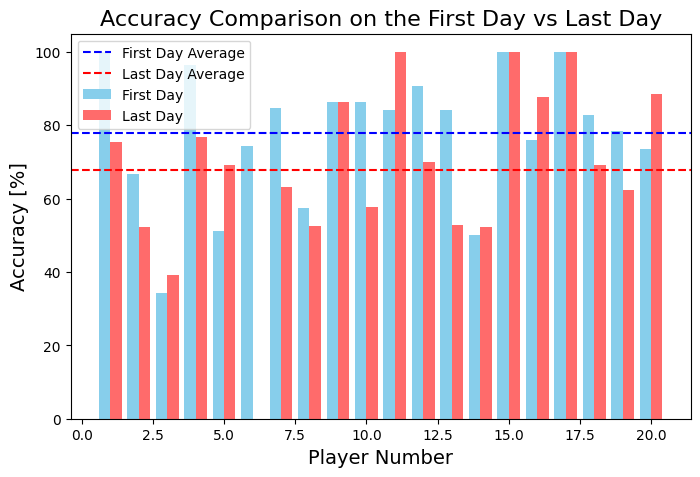

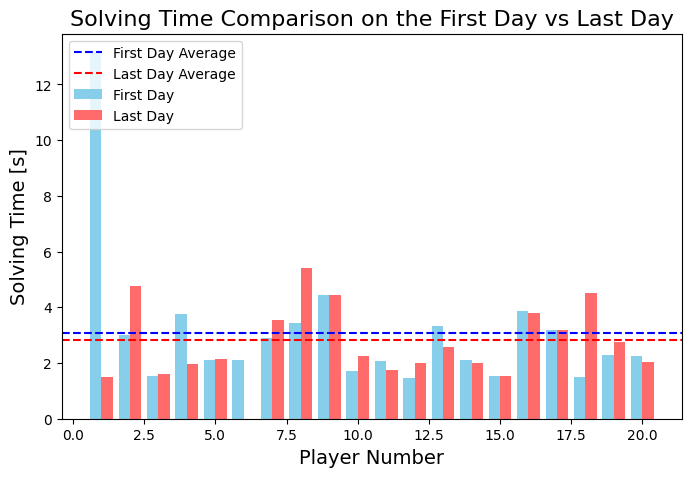

In [274]:
import matplotlib.pyplot as plt

# Create a figure and axis for accuracy comparison
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create 'Player number' by mapping 'player_ID' values
player_info_df['Player number'] = range(1, len(player_info_df) + 1)

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Accuracy values for the first and last days
first_day_acc = player_info_df['first_ability_acc']
last_day_acc = player_info_df['last_ability_acc']

# Convert accuracy values to percentages
first_day_acc = first_day_acc * 100
last_day_acc = last_day_acc * 100

# Calculate averages for the first and last days
first_day_avg = first_day_acc.mean()
last_day_avg = last_day_acc.mean()

# Define custom colors
light_blue = '#87CEEB'  # Light blue
light_red = '#FF6B6B'  # Light red

# Create bar plots for accuracy
ax1.bar(x - 0.2, first_day_acc, width=0.4, label='First Day', align='center', color=light_blue)
ax1.bar(x + 0.2, last_day_acc, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for accuracy averages
ax1.axhline(first_day_avg, color='blue', linestyle='--', label='First Day Average')
ax1.axhline(last_day_avg, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for accuracy comparison
ax1.set_xlabel('Player Number', fontsize=14)
ax1.set_ylabel('Accuracy [%]', fontsize=14)
ax1.set_title('Accuracy Comparison on the First Day vs Last Day', fontsize=16)
ax1.legend(loc='upper left')

# Create a figure and axis for solving time comparison
fig, ax2 = plt.subplots(figsize=(8, 5))

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Solving time values for the first and last days
first_day_solving_time = player_info_df['first_ability_solving_time']
last_day_solving_time = player_info_df['last_ability_solving_time']

# Convert solving time from milliseconds to seconds
first_day_solving_time = first_day_solving_time / 1000
last_day_solving_time = last_day_solving_time / 1000

# Calculate averages for the first and last days
first_day_avg_solving_time = first_day_solving_time.mean()
last_day_avg_solving_time = last_day_solving_time.mean()

# Print the difference between the first and last day averages
print("Difference between first and last day averages:" + str(first_day_avg_solving_time - last_day_avg_solving_time))

# Create bar plots for solving time
ax2.bar(x - 0.2, first_day_solving_time, width=0.4, label='First Day', align='center', color=light_blue)
ax2.bar(x + 0.2, last_day_solving_time, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for solving time averages
ax2.axhline(first_day_avg_solving_time, color='blue', linestyle='--', label='First Day Average')
ax2.axhline(last_day_avg_solving_time, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for solving time comparison
ax2.set_xlabel('Player Number', fontsize=14)
ax2.set_ylabel('Solving Time [s]', fontsize=14)
ax2.set_title('Solving Time Comparison on the First Day vs Last Day', fontsize=16)
ax2.legend(loc='upper left')

# Show the plots
plt.show()

### Paired t-test

In [280]:
import pandas as pd 
import scipy.stats as stats 

# Load the data from the CSV file
player_info_df = pd.read_csv("min_player_info.csv")

# remove player 46 from the dataframe (since the player did not solve any equations correctly on the last day and thus does not have a solving time)
player_info_df = player_info_df[player_info_df['player_ID'] != 46]

# Filter the data to include only the relevant columns
accuracy_first = player_info_df['first_ability_acc']
accuracy_last = player_info_df['last_ability_acc']
solving_time_first = player_info_df['first_ability_solving_time']
solving_time_last = player_info_df['last_ability_solving_time']

# Test 1 - accuracy
stats.ttest_rel(accuracy_first, accuracy_last)

TtestResult(statistic=1.855259124642258, pvalue=0.08001205341625134, df=18)

In [281]:
# Test 2 - solving time
stats.ttest_rel(solving_time_first, solving_time_last)

TtestResult(statistic=0.45511153104231516, pvalue=0.654470559880536, df=18)

### Wilcoxen

In [282]:
import scipy.stats as stats

# Test 1 - accuracy
stats.wilcoxon(accuracy_first, accuracy_last)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=32.0, pvalue=0.06267138786896244)

In [283]:
# Test 2 - solving time
stats.wilcoxon(solving_time_first, solving_time_last)

WilcoxonResult(statistic=57.0, pvalue=0.5694942779917188)

# Multiplication

In [285]:
import pandas as pd

# Create an empty dictionary to store player information
player_info_dict = {}

# Group the plus_df_clean dataframe by player_ID
grouped = mul_df_clean.groupby('player_ID')

# Define the function to determine the group based on player_ID
def get_group(player_id):
    if player_id in class1_ml_players:
        return "Class 1 ML"
    elif player_id in class1_normal_players:
        return "Class 1 Normal"
    elif player_id in class2_ml_players:
        return "Class 2 ML"
    elif player_id in class2_normal_players:
        return "Class 2 Normal"
    else:
        return "Unknown"

# Iterate through each player's data
for player_id, group in grouped:
    first_day = group['Date'].min()
    last_day = group['Date'].max()
    first_ability_acc = group[group['Date'] == first_day]['Correct'].mean()
    last_ability_acc = group[group['Date'] == last_day]['Correct'].mean()
    
    first_day_data = group[group['Date'] == first_day]
    last_day_data = group[group['Date'] == last_day]

    # Consider only the equations that were calculated correctly
    first_ability_solving_time = first_day_data[first_day_data['Correct'] == 1]['Time'].mean()
    last_ability_solving_time = last_day_data[last_day_data['Correct'] == 1]['Time'].mean()
    
    total_equations = group.shape[0]

    # Determine the group based on player_ID
    group = get_group(player_id)

    player_info_dict[player_id] = {
        'player_ID': player_id,
        'group': group,
        'first_day': first_day,
        'last_day': last_day,
        'first_ability_acc': first_ability_acc,
        'last_ability_acc': last_ability_acc,
        'first_ability_solving_time': first_ability_solving_time,
        'last_ability_solving_time': last_ability_solving_time,
        'total_equations': total_equations
    }

# Remove player with player_ID 53 from the dictionary
#del player_info_dict[53]

# Create a dataframe from the player_info_dict
player_info_df = pd.DataFrame.from_dict(player_info_dict, orient='index')

# Print the dataframe
print(player_info_df)

# Save the dataframe to a CSV file
player_info_df.to_csv("mul_player_info.csv", index=False)

    player_ID           group   first_day    last_day  first_ability_acc  \
39         39  Class 1 Normal  2023-10-26  2023-10-26           0.413793   
40         40      Class 1 ML  2023-10-26  2023-10-26           0.833333   
41         41  Class 1 Normal  2023-10-24  2023-10-26           0.321285   
42         42      Class 1 ML  2023-10-31  2023-11-01           1.000000   
43         43  Class 1 Normal  2023-10-24  2023-10-31           1.000000   
44         44      Class 1 ML  2023-10-24  2023-11-01           0.432099   
45         45  Class 1 Normal  2023-10-25  2023-11-01           0.571429   
47         47  Class 1 Normal  2023-10-25  2023-11-01           0.660377   
48         48      Class 1 ML  2023-10-25  2023-10-30           0.454545   
49         49  Class 1 Normal  2023-10-24  2023-10-24           0.222222   
50         50      Class 1 ML  2023-10-31  2023-11-01           0.358696   
51         51  Class 2 Normal  2023-10-30  2023-11-03           0.500000   
55         5

Difference between first and last day averages:0.062476783235551725


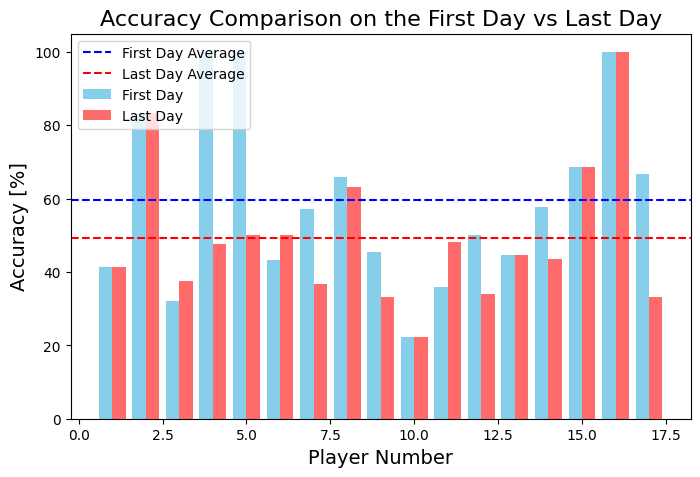

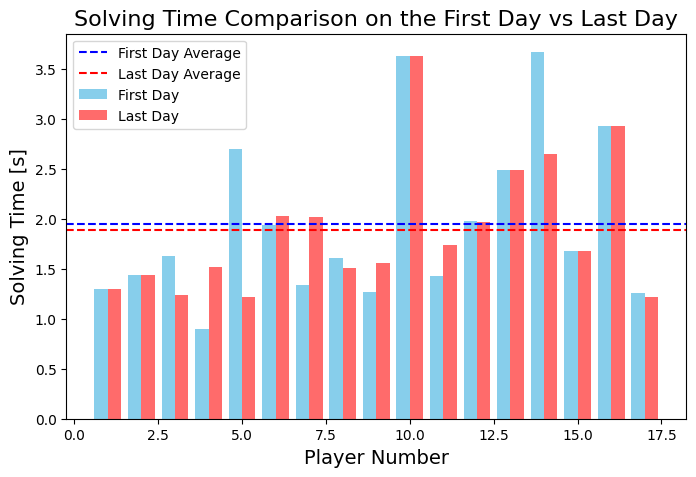

In [286]:
import matplotlib.pyplot as plt

# Create a figure and axis for accuracy comparison
fig, ax1 = plt.subplots(figsize=(8, 5))

# Create 'Player number' by mapping 'player_ID' values
player_info_df['Player number'] = range(1, len(player_info_df) + 1)

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Accuracy values for the first and last days
first_day_acc = player_info_df['first_ability_acc']
last_day_acc = player_info_df['last_ability_acc']

# Convert accuracy values to percentages
first_day_acc = first_day_acc * 100
last_day_acc = last_day_acc * 100

# Calculate averages for the first and last days
first_day_avg = first_day_acc.mean()
last_day_avg = last_day_acc.mean()

# Define custom colors
light_blue = '#87CEEB'  # Light blue
light_red = '#FF6B6B'  # Light red

# Create bar plots for accuracy
ax1.bar(x - 0.2, first_day_acc, width=0.4, label='First Day', align='center', color=light_blue)
ax1.bar(x + 0.2, last_day_acc, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for accuracy averages
ax1.axhline(first_day_avg, color='blue', linestyle='--', label='First Day Average')
ax1.axhline(last_day_avg, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for accuracy comparison
ax1.set_xlabel('Player Number', fontsize=14)
ax1.set_ylabel('Accuracy [%]', fontsize=14)
ax1.set_title('Accuracy Comparison on the First Day vs Last Day', fontsize=16)
ax1.legend(loc='upper left')

# Create a figure and axis for solving time comparison
fig, ax2 = plt.subplots(figsize=(8, 5))

# X-axis values will be 'Player number' instead of 'player_ID'
x = player_info_df['Player number']

# Solving time values for the first and last days
first_day_solving_time = player_info_df['first_ability_solving_time']
last_day_solving_time = player_info_df['last_ability_solving_time']

# Convert solving time from milliseconds to seconds
first_day_solving_time = first_day_solving_time / 1000
last_day_solving_time = last_day_solving_time / 1000

# Calculate averages for the first and last days
first_day_avg_solving_time = first_day_solving_time.mean()
last_day_avg_solving_time = last_day_solving_time.mean()

# Print the difference between the first and last day averages
print("Difference between first and last day averages:" + str(first_day_avg_solving_time - last_day_avg_solving_time))

# Create bar plots for solving time
ax2.bar(x - 0.2, first_day_solving_time, width=0.4, label='First Day', align='center', color=light_blue)
ax2.bar(x + 0.2, last_day_solving_time, width=0.4, label='Last Day', align='center', color=light_red)

# Add horizontal dotted lines for solving time averages
ax2.axhline(first_day_avg_solving_time, color='blue', linestyle='--', label='First Day Average')
ax2.axhline(last_day_avg_solving_time, color='red', linestyle='--', label='Last Day Average')

# Set labels and title for solving time comparison
ax2.set_xlabel('Player Number', fontsize=14)
ax2.set_ylabel('Solving Time [s]', fontsize=14)
ax2.set_title('Solving Time Comparison on the First Day vs Last Day', fontsize=16)
ax2.legend(loc='upper left')

# Show the plots
plt.show()